# Tabular Q Learning with OpenAi gym

The purpose of this workbook is to work through a simple tabular q problem (cartpole) using OpenAi's gym

https://gym.openai.com/envs/CartPole-v0/

decription below:

"A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center."


In [2]:
# put this up here incase the rest crashes..


import numpy as np
import gym
import math

env = gym.make('CartPole-v0')

[2018-04-01 11:59:27,434] Making new env: CartPole-v0


In [4]:


# first lets copy in the cartpole code from OpenAi's example 





for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        
        # so we need to implement our tabular Q agents activities around here
        
        #action = 0 #applying a force to the left
        action = env.action_space.sample() # sampling the "action" array which in this case only contains two elements
        
        # action contains 0 (apply force to the left) and 1 (apply force from the right)
        # by sampling the action array above we are choosing one of these two possible actions at random
        
        # and here
        
        
        observation, reward, done, info = env.step(action) 
        
        # here we taking the next "step" in our environment by taking in our action variable randomly selected above
        
        
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

[ 0.03994349  0.00017641 -0.01114045  0.04450254]
[ 0.03994702  0.19545633 -0.0102504  -0.25167438]
[ 0.04385614  0.39072314 -0.01528388 -0.54757277]
[ 0.05167061  0.58605644 -0.02623534 -0.84503179]
[ 0.06339174  0.3913021  -0.04313597 -0.56071312]
[ 0.07121778  0.58700206 -0.05435024 -0.86666804]
[ 0.08295782  0.78281985 -0.0716836  -1.17593211]
[ 0.09861422  0.97879615 -0.09520224 -1.49019854]
[ 0.11819014  1.17493957 -0.12500621 -1.81102857]
[ 0.14168893  1.37121346 -0.16122678 -2.13979827]
[ 0.1691132   1.56752054 -0.20402275 -2.47763563]
Episode finished after 11 timesteps
[ 0.04454963 -0.0260319  -0.02706994  0.00961162]
[ 0.044029   -0.22075538 -0.0268777   0.29363225]
[ 0.03961389 -0.41548402 -0.02100506  0.57771862]
[ 0.03130421 -0.61030537 -0.00945069  0.86371114]
[ 0.0190981  -0.80529739  0.00782354  1.15340765]
[ 0.00299215 -1.00052051  0.03089169  1.44853347]
[-0.01701826 -0.80579168  0.05986236  1.16566029]
[-0.03313409 -1.00163949  0.08317556  1.47649483]
[-0.05316688 -

[-0.16999037 -1.00893587  0.11829338  1.48871616]
[-0.19016909 -0.81543666  0.14806771  1.23519295]
[-0.20647782 -1.01211841  0.17277156  1.57036044]
[-0.22672019 -1.20883015  0.20417877  1.91157762]
Episode finished after 31 timesteps
[-0.0252764  -0.03116018  0.00927371  0.04671561]
[-0.0258996   0.16382757  0.01020802 -0.24302701]
[-0.02262305 -0.03143869  0.00534748  0.05285823]
[-0.02325182 -0.2266369   0.00640465  0.34722352]
[-0.02778456 -0.42184937  0.01334912  0.64191916]
[-0.03622155 -0.61715483  0.0261875   0.93877577]
[-0.04856465 -0.42239553  0.04496302  0.65443524]
[-0.05701256 -0.22792751  0.05805172  0.37624269]
[-0.06157111 -0.03367607  0.06557657  0.10241399]
[-0.06224463 -0.22967354  0.06762485  0.41504398]
[-0.0668381  -0.03557197  0.07592573  0.14442366]
[-0.06754954 -0.23169451  0.07881421  0.46006067]
[-0.07218343 -0.42783688  0.08801542  0.77650831]
[-0.08074017 -0.62405195  0.10354559  1.09553477]
[-0.09322121 -0.82037381  0.12545628  1.41882832]
[-0.10962868 -

[ 0.02087857 -0.01931018 -0.04514107 -0.03286098]
[ 0.02049237  0.17642907 -0.04579829 -0.33943773]
[ 0.02402095 -0.01801231 -0.05258705 -0.06154147]
[ 0.0236607  -0.21234238 -0.05381788  0.21409721]
[ 0.01941386 -0.40665526 -0.04953593  0.48932971]
[ 0.01128075 -0.60104465 -0.03974934  0.76599851]
[-0.00074014 -0.40539859 -0.02442937  0.46107801]
[-0.00884811 -0.60016689 -0.01520781  0.74596176]
[ -2.08514527e-02  -4.04838434e-01  -2.88573231e-04   4.48532034e-01]
[-0.02894822 -0.2097124   0.00868207  0.15575816]
[-0.03314247 -0.40495758  0.01179723  0.45116738]
[-0.04124162 -0.21000444  0.02082058  0.16222633]
[-0.04544171 -0.40541817  0.0240651   0.4614042 ]
[-0.05355007 -0.60087184  0.03329319  0.76157427]
[-0.06556751 -0.79643622  0.04852467  1.06454467]
[-0.08149623 -0.60198894  0.06981557  0.78747773]
[-0.09353601 -0.40789191  0.08556512  0.51755055]
[-0.10169385 -0.21407235  0.09591613  0.25301029]
[-0.1059753  -0.02044152  0.10097634 -0.00794481]
[-0.10638413 -0.21685575  0.10

we need to understand what the observation variables are (are they velocity, acceleration, angle from the centre line? etc etc) and also which variable is which.

I found out what these were doing a quick google search, the answer is located here:

https://github.com/openai/gym/issues/238

turns out to be:

[position of cart, velocity of cart, angle of pole, rotation rate of pole]



So what I learned from my conversation with Will, is first we need to discretize the outputs (put then in "buckets" from our cartpole, I am going to just copy his method to discretize, line by line (so that I know what is going on) to do this

we need to do this because we need to convert "the continuous, 4-dimensional input space to a discrete space with a finite and preferably small, yet expressive, number of discrete states"

In [20]:
#so observation space high - prints out the highest value observed in the observation space over one training episode
# observation space low - prints out the lowest value observed in the oberservation.....

print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Discrete(2)
Box(4,)
[  4.80000000e+00   3.40282347e+38   4.18879020e-01   3.40282347e+38]
[ -4.80000000e+00  -3.40282347e+38  -4.18879020e-01  -3.40282347e+38]


In [5]:
   #    self.bins = []
#    self.bins.append(np.linspace(-2.4, 2.4, 5))
 #       self.bins.append(np.linspace(-0.5, 0.5, 5))
        self.bins.append(np.linspace(-41.8, 41.8, 5))
        self.bins.append(np.linspace(-math.radians(50), math.radians(50), 5))



#next Will created a numpy array with values...

#x is just an example of some random input for testing purposes....

x = np.array([-2.4, 0, -4.0, 4, 2])

# next he created the bins using the max and the minimum values from our printing of the observation space above...
# with 12 'bins' for discretization purposes
bins = np.linspace(-4.8, 4.8, 12) 

#the next line of code implements discretization on our test variables x
out = np.digitize(x, bins)

print out



[ 3  6  1 11  8]


it is important to note that the output of the above is the POSITION of the discretized version of X in the new bin array!!! aka the index.

ok time to implement our Q learner, I am going to do this using these two websites as referances:

http://mnemstudio.org/path-finding-q-learning-tutorial.htm

https://towardsdatascience.com/introduction-to-q-learning-88d1c4f2b49c
 
and this

https://dev.to/n1try/cartpole-with-q-learning---first-experiences-with-openai-gym

and Will's workbook:

https://github.com/whathelll/DeepRLBootCampLabs/blob/master/pytorch/4-CartPoleQLearning.ipynb

I also would like to implement the Q agent uses Python Classes, to refresh my memory on how to write them

finally the most important thing in all of the formula to update the Q table. It goes something like this:

Q = Q(s,a) + alpha * (R + discount * max(Q(s',a')) - Q)

or

Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]

or graphically:

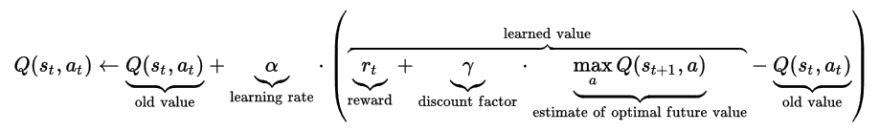

https://res.cloudinary.com/practicaldev/image/fetch/s--k7Z0JGcN--/c_limit,f_auto,fl_progressive,q_auto,w_880/https://ferdinand-muetsch.de/images/cartpole3.png




Q learning algorithm:

Algorithm:

    1. Initialise Q-matrix by all zeros. Set value for ‘γ’. Fill rewards matrix.
    2. For each episode. Select a random starting state (here we will restrict our starting state to state-1).
    3. Select one among all possible actions for the current state (S).
    4. Travel to the next state (S’) as a result of that action (a).
    5. for all possible actions from the state (S’) select the one with the highest Q value.
    6. Update Q-table using eqn.1 .
    7. Set the next state as the current state.
    8. If goal state reached then end.
    
as implemented by the other dude:

The Q-Learning algorithm goes as follows:

    1. Set the gamma parameter, and environment rewards in matrix R.

    2. Initialize matrix Q to zero.

    3. For each episode:

        Select a random initial state.

        Do While the goal state hasn't been reached.

            Select one among all possible actions for the current state.
            Using this possible action, consider going to the next state.
            Get maximum Q value for this next state based on all possible actions.
            Compute: Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]
            Set the next state as the current state.

        End Do

    End For


TO DO:

- the Q table is only discovering 6 states every time, there should be 15 (3x5) and therefore 30 Q values (3x5x2)
- the Q values are converging to 1 (they should be -43 , 90 etc: (from Wills example)

In [3]:
##############################################################################
#
# implementation using a python dictionary as the Q table
#
##############################################################################

import numpy as np
import gym
import math

env = gym.make('CartPole-v0')

class QTabular():
    
    #, buckets = (1,1,6,12,)
    def __init__(self, alpha = 0.1, gamma = 0.99, epsilon = 0.01,numberOfEpisodes = 2):
        
        self.alpha = alpha # learning rate, 0.1 is the optimal paramters taken from Ferdinands Tabular Grid Search
        self.gamma = gamma # discount factor, used to control the "weight" that is given to future reward
        self.epsilon = epsilon # how much we want to explore...see multi armed bandit workbookd
        #self.buckets = buckets # downscaling the feature space from continous to these 'bucket' sizes
                               # tuned parameters borrowed from Ferdinand 
        
            
            
        self.numberOfEpisodes = numberOfEpisodes
            
        self.env = gym.make('CartPole-v0')
        
        self.S_initial = self.env.reset() # intitial observation from openAi gym
        
        
        self.buckets = []
        
        #this is bad, should write code to automatically detect thesem but, uh, I am lazy
        # parameter numbers  from Will's notebook referanced above
        self.buckets.append(np.linspace(-2.4, 2.4, 1))
        self.buckets.append(np.linspace(-0.5, 0.5, 1))
        self.buckets.append(np.linspace(-41.8, 41.8, 5))
        self.buckets.append(np.linspace(-math.radians(50), math.radians(50), 5))
        
        
        #using Wills idea of a python dictionary for the Q table
        self.Q = {} 
        
        #measuring the dimensionality (length) of the observation space
        self.observationSpaceLength = env.observation_space.shape
        self.obs_length = self.observationSpaceLength[0]
        
        #measuring the dimensionality of the action space
        self.n = self.env.action_space.n
        
        print "dimensionality of action space is is : ", self.n
        print "dimensionality of observation space is is : ", self.obs_length
        
                   
    
    #this function allocated the raw observation data into its right "bucket" allocated above
    def quantizeState(self, state):
        
        quantizedState_index = []
        
        for i in range(4):
            
            x =  np.digitize(state[i], self.buckets[i])
            #digitize notation starts at 1 therefore we have to subtract 1 to get it inline
            #with our array notation... (this took 4 hours to figure out)
            x = x-1
            

            if x < 0:
                x = 0
            
            quantizedState_index.append(x)                       
    
        #returns a pointer that can be used to retrieve the specific "bucket" in questions value
        return tuple(quantizedState_index)
        
        
    
    def resetState(self):
        
        observation = self.env.reset()
        
        return observation
    
    
        
        
        
    
    def getEnvironmentVariables(self,action):
        
        observation, reward, done, _ =  self.env.step(action)
        
        return(observation, reward, done)
    
    
    def randomAction(self):
                          
        action = self.env.action_space.sample()
        
        return action
                          
    

                          
            
    def getQvalues(self, state, action=None):
        
        #if the state key 'state' is not in the current table, set its Q values to 0.
        if not state in self.Q:
            self.Q[state] = [0, 0]
        
        #if the state already has a Q value, return it, otherwise return the zeroed version of it
        if action is not None:
            return self.Q[state][action] #returns a single Q value given an action
        else:
            return self.Q[state] #returns array of q values , [0, 0] , given above
                                  
    
    def getMaxQ(self, S_dash):
        
        tempQvaluesArray = self.getQvalues(S_dash)

        #argmax the "index" of the maximum Q value (0 or 1 as we only have two possible actions)
        return np.argmax(tempQvaluesArray)
    
    
    def getAction(self, state, episodeCounter):
    
        ZeroToOne = 0.0
        
        if episodeCounter > 100:
            ZeroToOne = 1.0
        else:
            ZeroToOne = episodeCounter/100
    
        #implementing the epsilon-greedy algorithm here
        #if(np.random.random(1)[0] < (1.0-self.epsilon)):
        
        if(np.random.random(1)[0] < (ZeroToOne-self.epsilon)):
            
            #print 'in GREEDY/exploitation mode'
            
            best_action_index = self.getMaxQ(state)
         
        
        else:
            
            best_action_index = self.env.action_space.sample()
            #print 'in Exploration mode'
            
        return best_action_index
        
        
    def updateQ(self, S_initial, S_dash, action, reward, maxQindex):

        
        Old_Q = self.getQvalues(S_initial, action)
        
        new_Q = Old_Q + self.alpha*(reward+self.gamma*(self.getQvalues(S_dash, maxQindex))-Old_Q)
        
        self.Q[S_initial][action] = new_Q
        
    
    def printQ(self):
        for s in self.Q:
            print(s, self.Q[s])
            


  
    def train(self, TRandom = False):
        
        episodeCounter = 0
        
        for k in range(self.numberOfEpisodes):
            
                          
            #first we take want to quantize the observation outputs from the environment
            S_initial = self.quantizeState(self.resetState()) #selecting a random initial state
            
            #set the Q values for this initial state (0,0)
            self.getQvalues(S_initial)
                       
            #print "nth episode", episodeCounter
            episodeCounter += 1
            
            
            step = 0
            
            while True:
                
                #If TRandom == True:
                    
                    #take a random action
                #action = self.randomAction()
                #else:
                    #take some action defined using epsilon-greedy
                action = self.getAction(S_initial,episodeCounter)
                    
                
                S_dash, reward, done = self.getEnvironmentVariables(action)
                
                #this next code insentivises the algorithm if is does not succesfully "learn"
                #by severly penalizing a final "step" that causes termination of the cartpole pole
                #simulation - due to the pole falling over.
                if done and step < 200:
                    reward = -100
                
                S_dash = self.quantizeState(S_dash)
                
                
                #getting the max Q value index ( so, which action should we take....)
                Qindex = self.getMaxQ(S_dash)
                
                self.updateQ(S_initial,S_dash, action, reward, Qindex)
                
                S_initial = S_dash
                
                step += 1
                
                if done:
                    #print "completed training"
                    break;
                    
                    

    def run(self):
            
        self.env.reset()
        self.env.render()
            
        S_initial = self.quantizeState(self.resetState())
            
        episode_reward = 0
        
        counter = 0
            
        while True:
            self.env.render()
            
            counter += 1
            
            #print "running, count is :", counter
                
            #getMaxQ
            
            MaxQIndex = self.getMaxQ(S_initial)
                
            S_dash, reward, done = self.getEnvironmentVariables(MaxQIndex)
            S_dash = self.quantizeState(S_dash)

                
            S_initial = S_dash
            episode_reward += reward
            

            if done:
                self.env.close()
                break;
        
        self.env.render(close=True)
        print("Total Reward: ", episode_reward)              
                
                
                


#test = QTabular(numberOfEpisodes = 200)
test = QTabular(numberOfEpisodes = 500)
test.train()

print "completed training"

test.printQ()

    

[2018-04-01 11:59:41,414] Making new env: CartPole-v0
[2018-04-01 11:59:41,429] Making new env: CartPole-v0


dimensionality of action space is is :  2
dimensionality of observation space is is :  4
completed training
((0, 0, 2, 1), [31.273250494460235, 45.668050325034336])
((0, 0, 1, 3), [14.867160291292862, 36.510927476833814])
((0, 0, 2, 0), [44.850440062213465, 26.80702707550874])
((0, 0, 1, 4), [-4.310321355654857, 3.8826045576571273])
((0, 0, 1, 0), [46.76670001047435, -5.41894467186013])
((0, 0, 2, 3), [-26.22589801820334, 45.92458975964449])
((0, 0, 1, 1), [47.012080651374504, 30.968955497307615])
((0, 0, 2, 2), [31.551300614783564, 45.658965492428955])
((0, 0, 1, 2), [46.85427001214968, 41.78378591120261])
((0, 0, 2, 4), [-51.33377283345862, -39.235903513696464])


In [5]:
test.run()

('Total Reward: ', 200.0)


#### key learninings

-  even with minor fluctations in variables such as learning rate, discount factor and epsilon the algorithm fails to find a stable solution
- You have to hack the reward with a massive negative penalization to get the algorithm to work correctly
- you have to implement episilon greedy, otherwise the algorithm fails to learn by never starting to exploit the best method it has found so far
- in the sbove implementation, you have to enable the position and velocity variables in order to get better stabilization ( it can converge a solution, but it is not as elegant... run it to see it)

# legacy code below

### All the code below are the hundreds of mini experiments I ran to get the above to work, left below if any of the python notation above does not make sense to you...have a look below. left behind for my own future referance sakes

In [1]:
buckets = []
buckets = buckets.append(np.linspace(3.40282347e+38 , -3.40282347e+38, 12))

print buckets

NameError: name 'np' is not defined

In [104]:
for k in range(4):
    print k

0
1
2
3


In [18]:
QTable = np.zeros((5, 5, 2))
print QTable

[[[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]]


In [3]:
Q = np.zeros((4,12,2))


testQ = []

testQ = testQ.append((12,2))

print testQ

None


In [67]:
env = gym.make('CartPole-v0')

observation = env.reset()

print observation
print type(observation)





[2018-01-23 14:09:12,103] Making new env: CartPole-v0


[-0.02610283 -0.01238608  0.04940541  0.0400357 ]
<type 'numpy.ndarray'>


In [103]:

action = env.action_space.sample()

n = env.action_space.n

print action
print n

observationSpaceLength = env.observation_space.shape

print observationSpaceLength[0]


1
2
4


In [31]:
buckets = []
        
        #this is bad, should write code to automatically detect thesem but, uh, I am lazy
buckets.append(np.linspace(-4.8, 4.8, 12))
buckets.append(np.linspace(-3.40282347e+38, 3.40282347e+38, 12))
buckets.append(np.linspace(-4.18879020e-01, 4.18879020e-01 , 12))
buckets.append(np.linspace(-3.40282347e+38 , 3.40282347e+38, 12))
        

In [131]:
# rewriting this using Wills numbers, lol

buckets = []
        
buckets.append(np.linspace(-2.4, 2.4, 1))
buckets.append(np.linspace(-0.5, 0.5, 1))
buckets.append(np.linspace(-41.8, 41.8, 5))
buckets.append(np.linspace(-math.radians(50), math.radians(50), 3))

In [134]:
Q = np.array([])
n = 2
        
for i in range(4):
            
    t = buckets[i].shape            
    Q = np.append(Q, np.zeros((t[0],n)))
    print Q


[ 0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [100]:
Q = []
n = 2

#Q = np.zeros((4,12,2))

for i in range(4):
            
    t = buckets[i].shape 
    print (t[0])
    Qtemp =  np.zeros((t[0],n))
    #Qtemp =  np.zeros((2,2))
    Q.append(Qtemp)
    
    
print Q

1
1
5
3
[array([[ 0.,  0.]]), array([[ 0.,  0.]]), array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]]), array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])]


In [87]:
for i in range(4):

    n = buckets[2].shape

#print n

#print type(n)
#print n[0]

(5,)
<type 'tuple'>
5


In [61]:
#[np.digitize(s_plus1[i], self.bins[i]) for i in range(4)]

quantizedState_index = []

print "state + 1 is :", state
print "\n"
print "quantized bucket # 1 is :", buckets[0]
print "\n"
print "quantized bucket # 2 is :", buckets[1]
print "\n"
print "quantized bucket # 3 is :", buckets[2]
print "\n"
print "quantized bucket # 4 is :", buckets[3]
print "\n"

print "now printing allocated buckets..."

for i in range(4):
    
    quantizedState_index.append(np.digitize(state[i], buckets[i]))
    
    print np.digitize(state[i], buckets[i])

state + 1 is : [-0.01823837 -0.02303988  0.03254898 -0.01319891]


quantized bucket # 1 is : [-2.4]


quantized bucket # 2 is : [-0.5]


quantized bucket # 3 is : [-41.8 -20.9   0.   20.9  41.8]


quantized bucket # 4 is : [-0.87266463  0.          0.87266463]


now printing allocated buckets...
1
1
3
1


In [65]:
#quatnizedState = buckets[quantizedState_index[0],quantizedState_index[1],quantizedState_index[2],quantizedState_index[3]]

print quantizedState_index


for i in range(4):
    print quantizedState_index[i]
    

print "now printing allocated buckets NUMBERS..."

quantizedState = []

for i in range(4):
    #print "test"
    #print np.digitize(state[i], buckets[i])
    
    tempvar = quantizedState_index[i]
    
    #array3[0][1]
    
    print tempvar
    
    print buckets[i][tempvar-1]
    
    quantizedState.append(buckets[i][tempvar-1])
    

        
        #fuck yeah working!!!!!

[array(1), array(1), array(3), array(1)]
1
1
3
1
now printing allocated buckets NUMBERS...
1
-2.4
1
-0.5
3
0.0
1
-0.872664625997


In [66]:
print quantizedState

for i in range(4):
    print quantizedState[i]

[-2.3999999999999999, -0.5, 0.0, -0.87266462599716477]
-2.4
-0.5
0.0
-0.872664625997


In [59]:
a = [1,2]
b = [3,4]


c = np.arange(12).reshape(6,2)
d = np.array([c,c,c])

Q = [a,b] 

k = 1

maxQ = np.argmax(c)

print c

print type(a)
print type(c)
print Q[k]
print maxQ


print c[1,:]

#how the hell does argmax work?
print np.argmax(c[1,:])

#max_value = max(my_list)

print max(c[2,:])

print c[2,1]

print d

#first one equals matrix (3rd) dimension
#second one equals row dimension
#third one equals column dimension
#print d[0,1,0]

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
<type 'list'>
<type 'numpy.ndarray'>
[3, 4]
11
[2 3]
1
5
5
[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]
  [ 8  9]
  [10 11]]

 [[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]
  [ 8  9]
  [10 11]]

 [[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]
  [ 8  9]
  [10 11]]]
2


In [123]:
Q = np.array([1,2,3])

c = np.array([7,8,9])
        

Q.append(c)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [7]:
#a = reshape(arange(9),(3,3))

a = [[1,2],[3,4]]


Q = np.zeros((5,2))

print type(Q)

<type 'numpy.ndarray'>


In [ ]:
#lets write this code the traditional way, then change it into a class

#alpha = 0.1, gamma = 0, epsilon = 0.1,numberOfEpisodes = 200):




In [18]:
#numpy array dimension experiment....

import numpy as np

A = np.zeros((6,12))
print np.shape(A)

#B = np.zeros((1,2))
B = np.zeros((2,))
print np.shape(B)

#C = A + B
#print np.shape(C)



buckets=(1, 1, 6, 12,)
print "shape of buckets is:", np.shape(buckets)

#print A

Q = np.zeros((4,12,2))

print Q

(6, 12)
(2,)
shape of buckets is: (4,)
[[[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]]


In [2]:
#perhaps instead of trying to reverse engineer it tomorrow, write it from scratch?

#figuring out how the Q matrix is defined for n dimensional space for example below
#  by playing around with the different values for 'buckets' and different permutations of 'Q'

import numpy as np
import gym

buckets=(1, 1, 12, 12,) #original, optimal bucket sizes are (1, 1, 6, 12,) 
#buckets=( 6, 12, )

#buckets= (1, 1,6, 12)
#np.zeros((2, 1))


env = gym.make('CartPole-v0')

# for a Q table:

# ROWS = STATES
# COLUMNS = ACTIONS

Q = np.zeros(buckets + (env.action_space.n,)) #original

#Q = np.zeros((2,)) #produces 1 x 2


#Q = np.zeros(buckets) # produces a  6 x 12 matrix
#Q = np.zeros((env.action_space.n,)) # produces a 1 x 2 matrix

print env.action_space.contains
print env.action_space.shape

print buckets
print env.action_space.n

print Q

[2018-01-21 21:38:28,466] Making new env: CartPole-v0


<bound method Discrete.contains of Discrete(2)>
(2,)
(1, 1, 6, 12)
2
[[[[[ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]]

   [[ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]]

   [[ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]]

   [[ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]]

   [[ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]]

   [[ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0.]
    [ 0.  0

In [2]:
# this is an old implementation of the tabular Q algorithm using matrices instead of dictionaries
# proved to be too complex to get working

# (not quite) working example off the internet (not my code)
import gym
import numpy as np
import math
from collections import deque

class QCartPoleSolver():
    def __init__(self, buckets=(1, 1, 6, 12,), n_episodes=1000, n_win_ticks=195, min_alpha=0.1, min_epsilon=0.1, gamma=1.0, ada_divisor=25, max_env_steps=None, quiet=False, monitor=False):
        self.buckets = buckets # down-scaling feature space to discrete range
        self.n_episodes = n_episodes # training episodes 
        self.n_win_ticks = n_win_ticks # average ticks over 100 episodes required for win
        self.min_alpha = min_alpha # learning rate
        self.min_epsilon = min_epsilon # exploration rate
        self.gamma = gamma # discount factor
        self.ada_divisor = ada_divisor # only for development purposes
        self.quiet = quiet

        self.env = gym.make('CartPole-v0')
        if max_env_steps is not None: self.env._max_episode_steps = max_env_steps
        if monitor: self.env = gym.wrappers.Monitor(self.env, 'tmp/cartpole-1', force=True) # record results for upload

        self.Q = np.zeros(self.buckets + (self.env.action_space.n,))

    def discretize(self, obs):
        upper_bounds = [self.env.observation_space.high[0], 0.5, self.env.observation_space.high[2], math.radians(50)]
        lower_bounds = [self.env.observation_space.low[0], -0.5, self.env.observation_space.low[2], -math.radians(50)]
        ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
        new_obs = [int(round((self.buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
        new_obs = [min(self.buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
        return tuple(new_obs)

    def choose_action(self, state, epsilon):
        return self.env.action_space.sample() if (np.random.random() <= epsilon) else np.argmax(self.Q[state])

    def update_q(self, state_old, action, reward, state_new, alpha):
        self.Q[state_old][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        
        print self.Q

    def get_epsilon(self, t):
        return max(self.min_epsilon, min(1, 1.0 - math.log10((t + 1) / self.ada_divisor)))

    def get_alpha(self, t):
        return max(self.min_alpha, min(1.0, 1.0 - math.log10(((t + 1) if (t + 1)>0 else 1) / (self.ada_divisor if self.ada_divisor>0 else 1))))
    
   # (math.log(boxCount if boxCount>0 else 1))

    def run(self):
        scores = deque(maxlen=100)

        for e in range(self.n_episodes):
            current_state = self.discretize(self.env.reset())

            alpha = self.get_alpha(e)
            epsilon = self.get_epsilon(e)
            done = False
            i = 0

            while not done:
                self.env.render()
                action = self.choose_action(current_state, epsilon)
                obs, reward, done, _ = self.env.step(action)
                new_state = self.discretize(obs)
                #print self.
                self.update_q(current_state, action, reward, new_state, alpha)
                current_state = new_state
                i += 1

            scores.append(i)
            mean_score = np.mean(scores)
            if mean_score >= self.n_win_ticks and e >= 100:
                if not self.quiet: print('Ran {} episodes. Solved after {} trials ✔'.format(e, e - 100))
                return e - 100
            if e % 100 == 0 and not self.quiet:
                print('[Episode {}] - Mean survival time over last 100 episodes was {} ticks.'.format(e, mean_score))

        if not self.quiet: print('Did not solve after {} episodes 😞'.format(e))
        return e

if __name__ == "__main__":
    solver = QCartPoleSolver()
    solver.run()
# gym.upload('tmp/cartpole-1', api_key='')

#(math.log(boxCount if boxCount>0 else 1))

[2018-01-20 15:10:39,512] Making new env: CartPole-v0


ValueError: math domain error

In [39]:

#old code (not using any of this)

state = observation

print state

quantizedState_index = [np.digitize(state[0], buckets[0]), np.digitize(state[1], buckets[1]), np.digitize(state[2], buckets[2]), np.digitize(state[3], buckets[3])]
#quatnizedState = buckets[quantizedState_index[0],quantizedState_index[1],quantizedState_index[2],quantizedState_index[3]]

#print quantizedState[0]
print type(quantizedState_index[0])
print quantizedState_index[0]
print quantizedState_index[1]
print quantizedState_index[2]
print quantizedState_index[3]

#quatnizedState = buckets[3,6,9,12]

[-0.01823837 -0.02303988  0.03254898 -0.01319891]
<type 'numpy.ndarray'>
1
1
3
1


In [3]:
import numpy as np
Q = {}

Q[(1, 1, 3, 3)] = [1, 2]
Q[(1, 1, 3, 4)] = [1, 2]
Q[(1, 1, 3, 5)] = [1, 2]
Q[(1, 1, 2, 3)] = [1, 2]
print(Q)

for s in Q:
    print(s, Q[s])

actions = Q[(1, 1, 3, 3)]  # retrieve both actions Q values from Q(s)
print("actions are: ",actions)

#maxQ
print("maxQ:", np.max(actions))

#argmax i.e. action with highest value
print("argmaxQ:", np.argmax(actions))


Q[(2, 2, 2, 3)] = [2, 2]
print(Q)
for i in Q:
    print("state:", i, "actions:", Q[i])
    
    
# to take an action, action can only be 0 or 1, which essentially is the position
#argmax i.e. action with highest value
print("argmaxQ:", np.argmax([15, 10]))

#Q = Q(s) + alpha * (gamma * maxQ(s') - Q(s))

print(np.max([25, 20]))

{(1, 1, 2, 3): [1, 2], (1, 1, 3, 4): [1, 2], (1, 1, 3, 5): [1, 2], (1, 1, 3, 3): [1, 2]}
((1, 1, 2, 3), [1, 2])
((1, 1, 3, 4), [1, 2])
((1, 1, 3, 5), [1, 2])
((1, 1, 3, 3), [1, 2])
('actions are: ', [1, 2])
('maxQ:', 2)
('argmaxQ:', 1)
{(1, 1, 2, 3): [1, 2], (1, 1, 3, 4): [1, 2], (1, 1, 3, 5): [1, 2], (1, 1, 3, 3): [1, 2], (2, 2, 2, 3): [2, 2]}
('state:', (1, 1, 2, 3), 'actions:', [1, 2])
('state:', (1, 1, 3, 4), 'actions:', [1, 2])
('state:', (1, 1, 3, 5), 'actions:', [1, 2])
('state:', (1, 1, 3, 3), 'actions:', [1, 2])
('state:', (2, 2, 2, 3), 'actions:', [2, 2])
('argmaxQ:', 0)
25


In [11]:
import numpy as np
Q = {}

d =(1, 1, 3, 3)

print type(d)

Q[(1, 1, 3, 3)] = [1, 2]
Q[(1, 1, 3, 4)] = [1, 2]
Q[(1, 1, 3, 5)] = [1, 2]
Q[(1, 1, 2, 3)] = [1, 2]
print(Q)

for s in Q:
    print(s, Q[s])

Qvalues = Q[(1, 1, 3, 3)]  # retrieve both actions Q values from Q(s)
print("Qvalues are: ",Qvalues)

#maxQ
print("maxQ:", np.max(Qvalues))

#argmax i.e. action with highest value
print("argmaxQ:", np.argmax(Qvalues))


Q[(2, 2, 2, 3)] = [2, 2]
print(Q)
for i in Q:
    print("state:", i, "actions:", Q[i])
    
    
# to take an action, action can only be 0 or 1, which essentially is the position
#argmax i.e. action with highest value
print("argmaxQ:", np.argmax([15, 10]))

#Q = Q(s) + alpha * (gamma * maxQ(s') - Q(s))

print(np.max([25, 20]))

<type 'tuple'>
{(1, 1, 2, 3): [1, 2], (1, 1, 3, 4): [1, 2], (1, 1, 3, 5): [1, 2], (1, 1, 3, 3): [1, 2]}
((1, 1, 2, 3), [1, 2])
((1, 1, 3, 4), [1, 2])
((1, 1, 3, 5), [1, 2])
((1, 1, 3, 3), [1, 2])
('Qvalues are: ', [1, 2])
('maxQ:', 2)
('argmaxQ:', 1)
{(1, 1, 2, 3): [1, 2], (1, 1, 3, 4): [1, 2], (1, 1, 3, 5): [1, 2], (1, 1, 3, 3): [1, 2], (2, 2, 2, 3): [2, 2]}
('state:', (1, 1, 2, 3), 'actions:', [1, 2])
('state:', (1, 1, 3, 4), 'actions:', [1, 2])
('state:', (1, 1, 3, 5), 'actions:', [1, 2])
('state:', (1, 1, 3, 3), 'actions:', [1, 2])
('state:', (2, 2, 2, 3), 'actions:', [2, 2])
('argmaxQ:', 0)
25


In [7]:
#testing referancing python dictionaries

import numpy as np
Q = {}

Q[(1, 1, 3, 3)] = [1, 2]

print Q[(1, 1, 3, 3)][0] # this notation correctly calls the right Q value
print Q[(1, 1, 3, 3)]

1
[1, 2]


In [ ]:
##############################################################################
#
# This original implementation used 2 dimensional matrices stored in an array to maintain the Q table
# turns out this approach is extremely hard to get working correctly
#
# switched to using Will's idea of a using a python dictionary, as it is far superior!
#
##############################################################################

class QTabular():
    
    #, buckets = (1,1,6,12,)
    def __init__(self, alpha = 0.1, gamma = 0, epsilon = 0.1,numberOfEpisodes = 2):
        
        self.alpha = alpha # learning rate, 0.1 is the optimal paramters taken from Ferdinands Tabular Grid Search
        self.gamma = gamma # discount factor, used to control the "weight" that is given to future reward
        self.epsilon = epsilon # how much we want to explore...see multi armed bandit workbook
        #self.buckets = buckets # downscaling the feature space from continous to these 'bucket' sizes
                               # tuned parameters borrowed from Ferdinand 
        
            
            
        self.numberOfEpisodes = numberOfEpisodes
            
        self.env = gym.make('CartPole-v0')
        
        self.S_initial = self.env.reset() # intitial observation from openAi gym
        
        
        self.buckets = []
        
        #this is bad, should write code to automatically detect thesem but, uh, I am lazy
        # parameter numbers  from Will's notebook referanced above
        self.buckets.append(np.linspace(-2.4, 2.4, 1))
        self.buckets.append(np.linspace(-0.5, 0.5, 1))
        self.buckets.append(np.linspace(-41.8, 41.8, 5))
        self.buckets.append(np.linspace(-math.radians(50), math.radians(50), 3))
        
        #
        print self.buckets[0], self.buckets[1], self.buckets[2], self.buckets[3]
        
        #self.Q = np.zeros((4,12,2))
        
        #using Wills idea of a python dictionary for the Q table
        #self.Q = {} #this method doesnt make sense either :(
        
        #measuring the dimensionality (length) of the observation space
        
        self.observationSpaceLength = env.observation_space.shape
        self.obs_length = self.observationSpaceLength[0]
        
        #measuring the dimensionality of the action space
        self.n = self.env.action_space.n
        
        print "dimensionality of action space is is : ", self.n
        print "dimensionality of observation space is is : ", self.obs_length
        
        # for a Q table:

        #  
        
        #np.array(test)   
        
        self.Q = [] 
        #np.array([])
               
    
    
    #this function allocated the raw observation data into its right "bucket" allocated above
    def quantizeState(self, state):
        
        quantizedState_index = []
        
        print state[0], state[1], state[2], state[3]
        
        for i in range(4):
    
            #quantizedState_index.append((np.digitize(state[i], self.buckets[i])))
        
        
        

            #print "test"
            
            x =  np.digitize(state[i], self.buckets[i])
            
            #digitize notation starts at 1 therefore we have to subtract 1 to get it inline
            #with our array notation... (this took 4 hours to figure out)
            x = x-1
            
            #print "state[i] is:", state[i]
            #print "buckets[i] Is:", self.buckets[i]
            #print "bucket assignment is:", x
            
            if x < 0:
                x = 0
            
            quantizedState_index.append(x)
        
        #because the state matrix is one dimensional, digitize is fucking out and assigning 1 instead of the
        #correct state index when we only have a 1x1 matrix (scalar)
        #quantizedState_index[0] = 0
        #quantizedState_index[1] = 0
            
        
        #print quantizedState_index[0], quantizedState_index[1], quantizedState_index[2], quantizedState_index[3]
        
        #quantizedState = []
        
        #for i in range(4):


            #tempvar = quantizedState_index[i]
            
            #quantizedState.append(buckets[i][tempvar-1])
                          
    
        #returns a pointer that can be used to retrieve the specific "bucket" in questions value
        return quantizedState_index
        
        
    
    def resetState(self):
        
        observation = self.env.reset()
        
        return observation
    
    
        
        
        
    
    def getEnvironmentVariables(self,action):
        
        observation, reward, done, _ =  self.env.step(action)
        
        return(observation, reward, done)
    
    
    def randomAction(self):
                          
        action = self.env.action_space.sample()
        
        return action
                          
    
    def getAction(self, currentState, episodeCounter):
    
        #implementing the epsilon-greedy algorithm here
        if(np.random.random(1)[0] < (1.0-epsilon)):
            print "yo mama"
            
            #print 'in GREEDY/exploitation mode'
            
            #best_action_index = np.argmax(q_table)
 
        
            #print best_action_index
        
        
            #action = best_action_index
            
            #def get_best_action(self, s):
            #return np.argmax(self.Q[s[0], s[1], s[2], s[3]])
            
            
        
        else:
            
            action = self.env.action_space.sample()
            #print 'in Exploration mode'
            
        return action
                          
    def initializeQ(self):
        
        for i in range(self.obs_length):
            

            t = self.buckets[i].shape            
            self.Q.append(np.zeros((t[0],self.n)))
                          
    
    def getMaxQ(self, S_dash):
            
        MaxQVector = []
        
        
        
        print "S_dash is:", S_dash[0],S_dash[1],S_dash[2], S_dash[3]
        
                          
        for k in range(self.obs_length):
            
           
            #print "S_dash is:",S_dash
            
            #print "the type of s_dash is:",type(S_dash)
            
            
            #print "k is:", k
            #print "the kth element of s dash is", S_dash[k]
            localQ = self.Q[k]
            
            print localQ
            
            tempVar = S_dash[k]
            
            #print "S_dash for this bin is:", tempVar
            
            MaxQ = max(localQ[tempVar,:])
            
            #print "tempq is", tempQ
            
            #MaxQ = max(localQ[(S_dash[k]),:])
            
            #print "maxQ is: ", MaxQ
            #this is all wrong....
            #we want to get the max Q value (not the max S.....)
            # the S just gives the index of which row to go to in the Q table
            
            #MaxQ =  #max(S_dash[k,:])
            MaxQVector.append(MaxQ)
            
            #MaxQVector = 1
            
            #print MaxQVector
                          
        return MaxQVector
                          
            #maxQ = np.argmax(self.Q[k])
            #max_value = max(my_list)
            #max_index = my_list.index(max_value)
        
    def updateQ(self, S_initial, S_dash, action, reward, maxQVector):
        print "test"
        
        #action is just an int.
        
        for k in range(self.obs_length):
            
            print "k is:", k
            
            localQ = self.Q[k]
            
            Old_q = localQ[(S_initial[k]),action]
            
            print type(k)
            print type(S_dash[k])
            print type(action)
            print type(maxQVector[k])
            
            #self.Q[k,int(S_dash[k]),action] = Old_q + self.alpha*(reward+self.gamma*(int(maxQVector[k]))-Old_q)
            self.Q[k][int(S_dash[k])][action] = Old_q + self.alpha*(reward+self.gamma*(int(maxQVector[k]))-Old_q)
            
            #first one equals matrix (3rd) dimension
            #second one equals row dimension
            #third one equals column dimension
            #print d[0,1,0]
            
            
            
            
            
            
        
    
    
    def train(self):
        
        for k in range(self.numberOfEpisodes):
            
            #initializing our Q matrix
            self.initializeQ()
                          
            #first we take want to quantize the observation outputs from the environment
            S_initial = self.quantizeState(self.resetState()) #selecting a random initial state
            
            #f = 1 
            
            #print self.buckets[0]
            #print self.buckets[1]
            #print self.buckets[2]
            #print self.buckets[3]
            
            counter = 0
            
            while True:
                
                print "nth episode", counter
                
                #env.render()
                
                #S_initial_temp = S_initial
                
                #action = #take some action defined using epsilon greedy maybe?
                
                #take a random action
                action = self.randomAction()
                
                print "action is:", action
                               
                #observation, reward, done
                
                print "getting a new observation"
                
                S_dash, reward, done = self.getEnvironmentVariables(action)
                S_dash = self.quantizeState(S_dash)
                
                #print type(S_dash)
                
                
                MaxQVector = self.getMaxQ(S_dash)
                
                
                
                
                print MaxQVector[0], MaxQVector[1], MaxQVector[2], MaxQVector[3]
                
                self.updateQ(S_initial,S_dash, action, reward, MaxQVector)
                
                S_initial = S_dash
                
                counter += 1
                
                if done:
                    print "completed training"
                    break;
                    
                

                
                #break()
        
                
                #print "running...."
                          
                #getAction(self, currentState, episodeCounter)
                #action = getAction(S_initial)
                
                #implement tabular Q here
                    

                
                
                
                
                   
                
                    
                
                
                #updating openAi gym with our new action determined from the epsilon-greedy algorithm above 
                
                #S, reward, done, _ =  getState(action)  # _ = delete info, previously the 'info' was here
                

        
 
    
#tester = QTabular()        
                          
#QTabular.run()   

test = QTabular()
test.train()